In [87]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from sklearn.decomposition import PCA 
from sklearn.metrics import accuracy_score


from sklearn.metrics import f1_score,confusion_matrix


In [34]:
df = pd.read_csv("breast-cancer-data.csv")
df['diagnosis'] = df['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [35]:
df = df.drop(['Unnamed: 32'], axis = 1 )

# Data Visualization

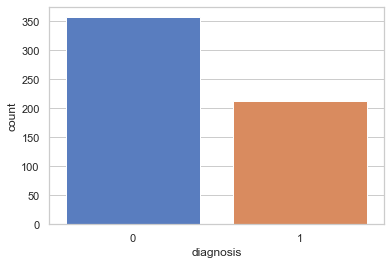

In [99]:
sns.countplot(df['diagnosis'])

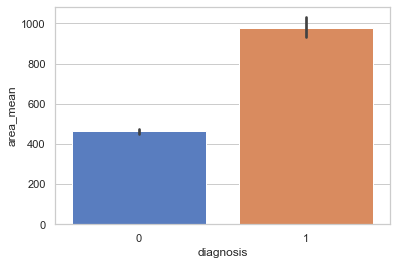

In [100]:
sns.barplot(df['diagnosis'],df['area_mean'])

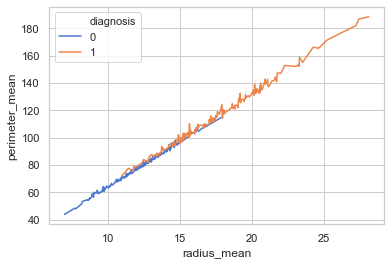

In [101]:
sns.lineplot(x = df['radius_mean'], y = df['perimeter_mean'], hue = df['diagnosis']) 

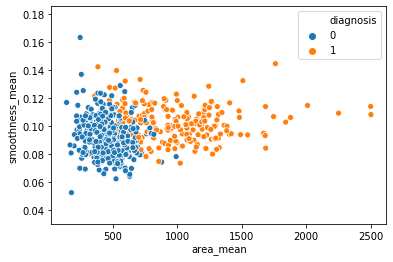

In [39]:
sns.scatterplot(x = df['area_mean'], y = df['smoothness_mean'], hue = df['diagnosis'])

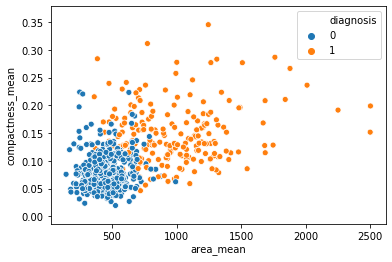

In [40]:
sns.scatterplot(x = df['area_mean'], y = df['compactness_mean'], hue = df['diagnosis'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

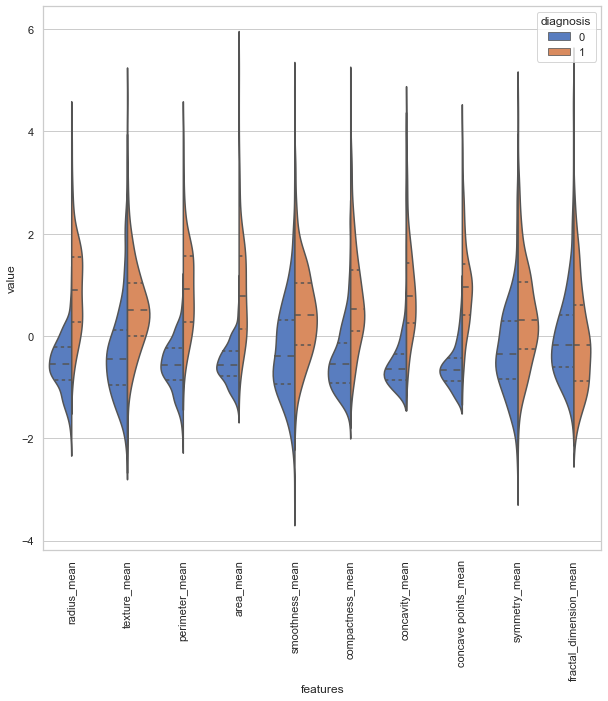

In [103]:
x = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']
data_n_2 = (x-x.mean())/x.std()
data = pd.concat([y,data_n_2.iloc[:,1:11]],axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y = 'value', hue='diagnosis', data = 
              data, split = True, inner = 'quart')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

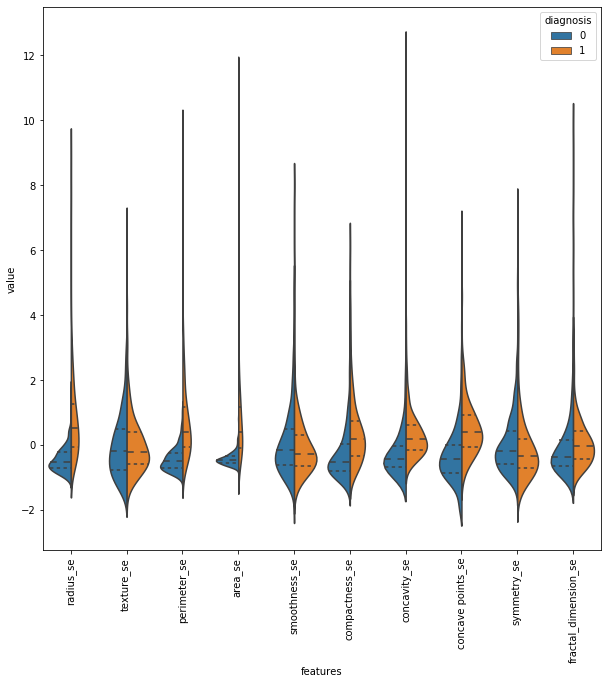

In [58]:
x = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']
data_n_2 = (x-x.mean())/x.std()
data = pd.concat([y,data_n_2.iloc[:,11:21]],axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y = 'value', hue='diagnosis', data = 
              data, split = True, inner = 'quart')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

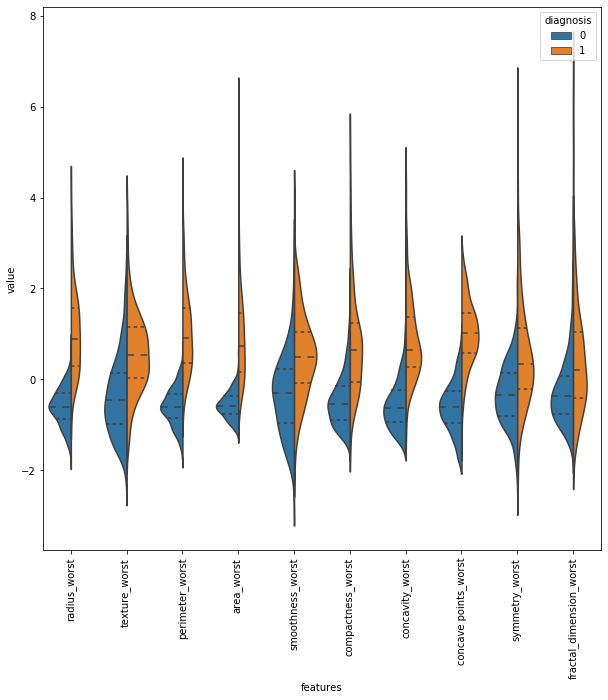

In [59]:
x = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']
data_n_2 = (x-x.mean())/x.std()
data = pd.concat([y,data_n_2.iloc[:,21:]],axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y = 'value', hue='diagnosis', data = 
              data, split = True, inner = 'quart')
plt.xticks(rotation=90)

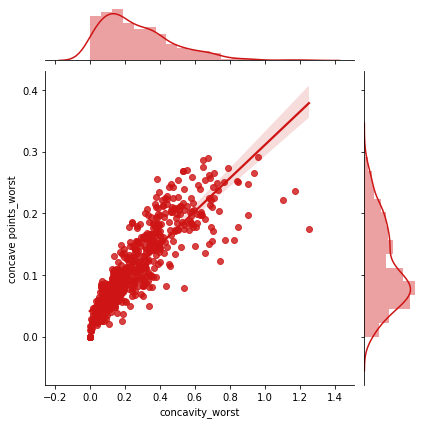

In [62]:
sns.jointplot(x.loc[:,'concavity_worst'], 
              x.loc[:,'concave points_worst'],
             kind = 'regg', 
             color = '#ce1414')

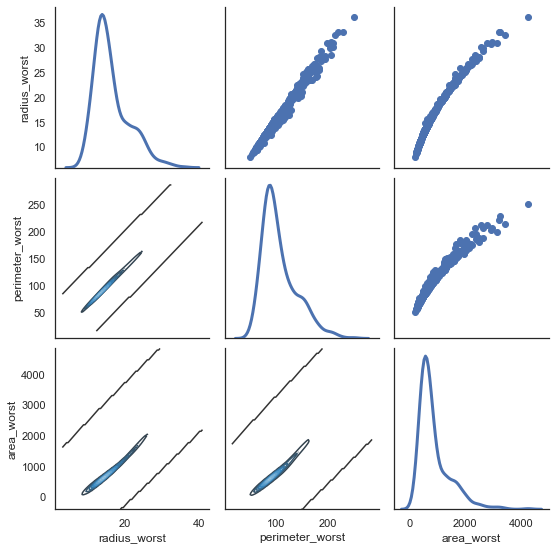

In [67]:
sns.set(style="white")
d = df.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(d, diag_sharey = False)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw =3 )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

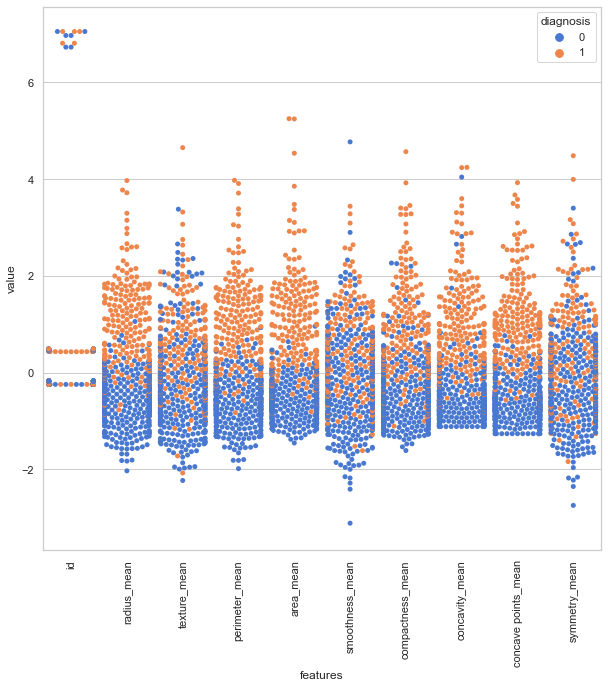

In [76]:
sns.set(style='whitegrid', palette="muted")
data_n_2 = (x - x.mean())/x.std()
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis = 1)
data = pd.melt(data, id_vars = 'diagnosis', var_name= 'features'
              , value_name = 'value')
plt.figure(figsize=(10,10))

sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', 
              data = data)
plt.xticks(rotation=90)

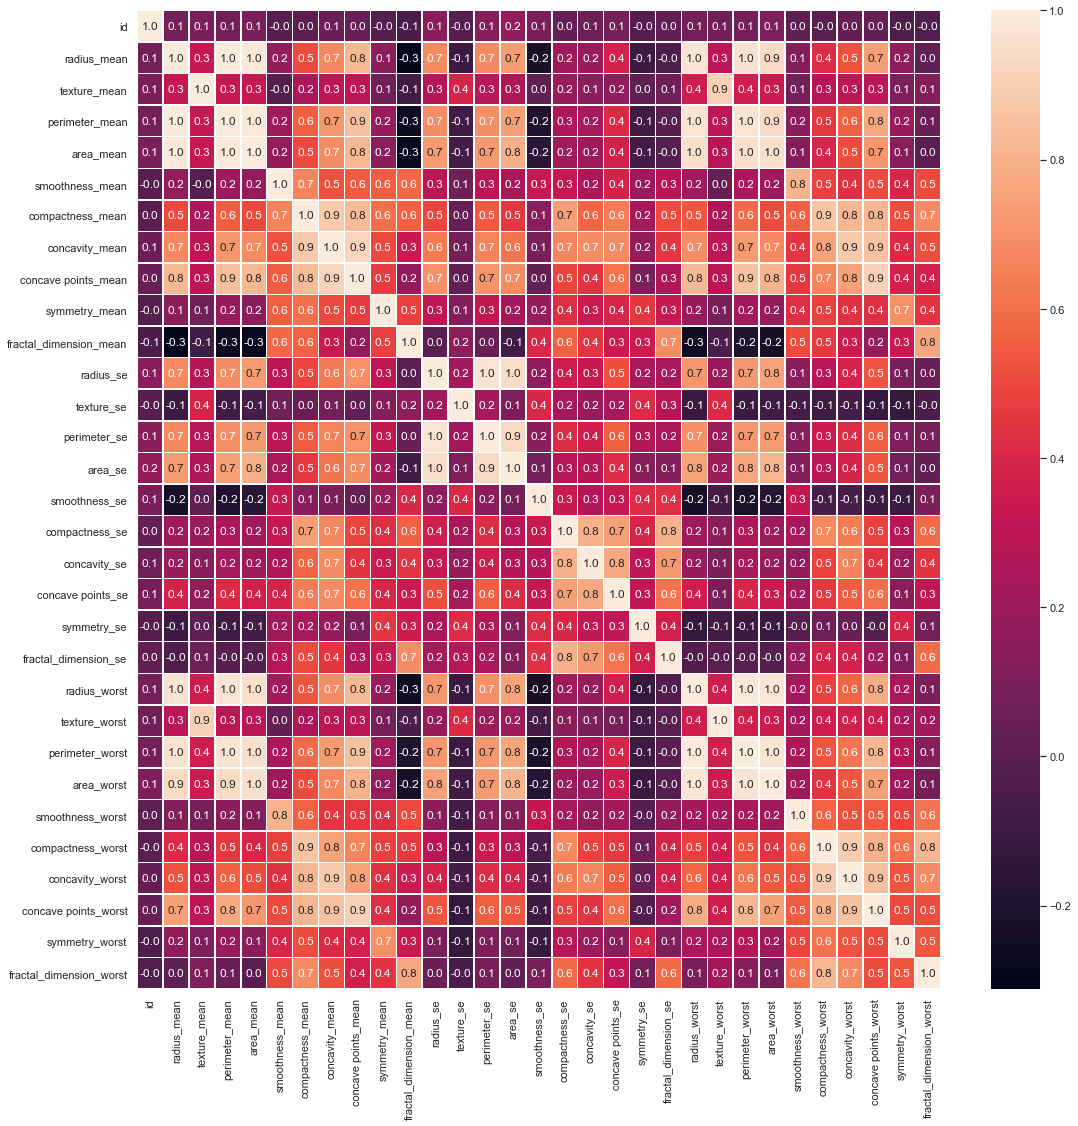

In [77]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(), annot = True, linewidths = .5, fmt = '.1f', ax=ax)

In [78]:
drop_list1 = ['id','perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1, axis = 1)
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


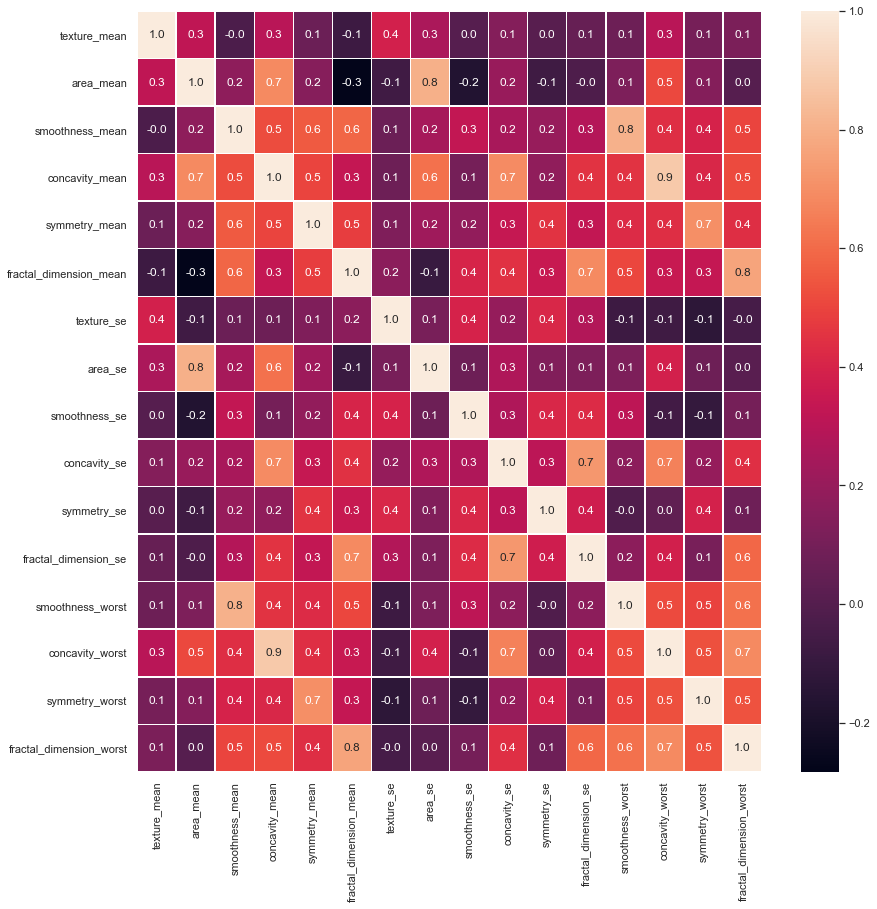

In [79]:
f, ax = plt.subplots(figsize=(14,14))
sns.heatmap(x_1.corr(), annot= True, linewidths = .5, 
           fmt = '.1f', ax=ax)

# Training with Random Forest Classifier

Accuracy is: 0.9649122807017544


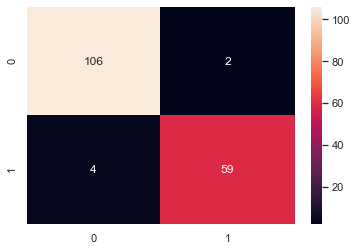

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y,test_size=0.3,
                                                   random_state=42)

clf_rf = RandomForestClassifier(random_state = 43)
clr_rf = clf_rf.fit(x_train, y_train)

ac = accuracy_score(y_test, clf_rf.predict(x_test))
print('Accuracy is: '+ str(ac))

cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt='d')

In [105]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

select_feature = SelectKBest(chi2, k =5).fit(x_train,y_train)

In [106]:
print('Score list: ', select_feature.scores_)
print('Feature list: ', x_train.columns)

Score list:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9707602339181286


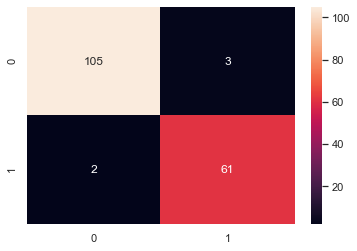

In [107]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_rf_2 = RandomForestClassifier()
clr_rf_2 = clf_rf_2.fit(x_train_2, y_train)
ac_2 = accuracy_score(y_test, clf_rf_2.predict(x_test_2))
print('Accuracy is: ', ac_2)
cm2 = confusion_matrix(y_test, clf_rf_2.predict(x_test_2))
sns.heatmap(cm2, annot = True, fmt = 'd')

In [109]:
from sklearn.feature_selection import RFE 

clf_rf_3 = RandomForestClassifier()
rfe = RFE(estimator = clf_rf_3, n_features_to_select =5, step=1)
rfe= rfe.fit(x_train, y_train)


In [110]:
print('Chosen best 5 features by RFE: ', x_train.columns[rfe.support_
                                                        
                                                    ])

Chosen best 5 features by RFE:  Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import RFECV 

clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator = clf_rf_4, step = 1, cv = 5, scoring = 
             'accuracy')
rfecv = rfecv.fit(x_train,y_train)

print('Optimal number of features: ', rfecv.n_features_)
print('Best features: ', x_train.columns[rfecv.support_])

Optimal number of features:  14
Best features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'smoothness_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()